# Preprocessing CITOR Model
There is no major preprocessing steps available for this model. I just need to change the name of the label to 'y' and also, some other relevant steps. So, in the first step I will add all the relavant columns to this model from 'xerostomia dataset' to my main dataset.

## First step
Adding some relavant columns to the main dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Statistic libraries
import statsmodels.api as sm
from scipy import stats

# Data generating and feature modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
# from mlxtend.feature_selection import SequentialFeatureSelector # Forward selection library
from sklearn.feature_selection import SequentialFeatureSelector

# Classification modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import  SVC
from pygam import LogisticGAM
from sklearn.pipeline import Pipeline

# Evaluation modules
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Model selection modules
from sklearn.model_selection import GridSearchCV


Open the excel files.

In [3]:
main_df = pd.read_excel('Overview_weeklyCT_patients.xlsx').drop(columns=['Unnamed: 0'])
main_df = main_df.sort_values('ID').reset_index().drop(columns=['index'])
xer_df = pd.read_excel('Xerostomia_dataset.xlsx')
main_df.head()

,ID,RTSTART,Session1,Session2,Session3,Session4,Session5,Session6,Session7,Session8,...,Number_of_weeklyCTs,accelerated_rt,modality_adjusted,gender,age,tumor_location,n_stage,t_stage,xer_06,xer_12
0,20715,2018-04-16,2018-04-18,2018-04-25,2018-05-02,2018-05-09,2018-05-16,2018-05-23,2018-05-30,NaT,...,7,0,Chemoradiation,Man,56,Oropharynx,N1,T4,2,1
1,21879,2015-06-01,2015-06-02,2015-06-09,2015-06-16,2015-06-23,2015-06-30,2015-07-07,2015-07-14,NaT,...,7,0,Chemoradiation,Man,67,Oropharynx,N2c,T2,2,2
2,52277,2015-06-15,2015-06-16,2015-06-23,2015-06-30,2015-07-07,2015-07-14,2015-07-21,2015-07-28,NaT,...,7,0,Chemoradiation,Man,50,Oropharynx,N2c,T4a,1,1
3,59896,2018-07-30,2018-08-01,2018-08-08,2018-08-15,2018-08-22,2018-08-29,2018-09-05,2018-09-12,NaT,...,7,0,Chemoradiation,Man,51,Oropharynx,N2b,T2,2,2
4,70426,2015-08-10,2015-08-11,2015-08-18,2015-08-25,2015-09-01,2015-09-08,2015-09-15,2015-09-22,NaT,...,5,0,Conventional RT,Man,75,Oropharynx,N1,T3,1,1


Slice the section of the dataset that contains the IDs of the main dataset. 

In [4]:
# Slice
xer__chosen_df = xer_df[xer_df.UMCG.isin(main_df.ID)]
xer__chosen_df = xer__chosen_df.sort_values('UMCG').reset_index().drop(columns=['index'])
xer__chosen_df.UMCG = xer__chosen_df.UMCG.astype('int')
xer__chosen_df.head()

,UMCG,DB,RTSTART,GESLACHT,LEEFTIJD,Technique_REDCAP,Loctum2,ROKEN,TSTAD_DEF,Histology,...,PCM_Inf_Dmean,PCM_Med_Dmean,PCM_Sup_Dmean,Parotid_R_Dmean,Parotid_L_Dmean,Parotid_Dmean,Submandibular_R_Dmean,Submandibular_L_Dmean,Submandibular_Dmean,Supraglottic_Dmean
0,20715,REDCAP,2018-04-16,Man,56.0,VMAT,Oropharynx,"Ja, nog steeds",T4,PCC,...,16.787087,38.330428,66.051506,17.745381,26.432968,22.461091,46.414356,68.835097,58.693037,25.305293
1,21879,CITOR750,2015-06-01,Man,67.0,IMRT,Oropharynx,"Ja, nog steeds",T2,PCC,...,25.805898,53.527220,67.438013,30.598383,33.259027,31.789204,55.280976,61.041476,57.937461,24.749849
2,52277,CITOR750,2015-06-15,Man,50.0,IMRT,Oropharynx,"Ja, nog steeds",T4a,PCC,...,30.940294,41.697859,58.868152,33.453960,32.082955,32.809701,63.251656,60.431295,62.009299,28.975017
3,59896,REDCAP,2018-07-30,Man,51.0,VMAT,Oropharynx,Nee,T2,PCC,...,29.809969,52.272689,60.347738,36.432793,27.249700,31.979660,67.497344,57.944604,62.717922,44.968213
4,70426,CITOR750,2015-08-10,Man,75.0,0,Oropharynx,"Ja, in verleden",T3,PCC,...,68.873235,64.785495,50.740363,24.209502,38.895937,31.140814,51.610812,71.052067,60.274318,67.212403


In [5]:
aaa = pd.DataFrame(xer__chosen_df.groupby('GESLACHT'))

general_shape = 0
for counter, row in aaa.iterrows():
    df_len = row.shape[0]

    if general_shape < df_len:
        train_df_name = row[0]
        general_shape = df_len


Add the relavant columns to the main df.

In [6]:
main_df = main_df.assign(xer_bsl=xer__chosen_df['HN35_Xerostomia_BSL'],

               Parotid_R_Dmean=xer__chosen_df['Parotid_R_Dmean'], 
               Parotid_L_Dmean=xer__chosen_df['Parotid_L_Dmean'], 
               Parotid_Dmean=xer__chosen_df['Parotid_Dmean'],

               BuccalMucosa_R_Dmean=xer__chosen_df['BuccalMucosa_R_Dmean'],
               BuccalMucosa_L_Dmean=xer__chosen_df['BuccalMucosa_L_Dmean'], 
               BuccalMucosa_Dmean=xer__chosen_df['BuccalMucosa_Dmean'],

               OralCavity_Ext_Dmean=xer__chosen_df['OralCavity_Ext_Dmean'],

               Submandibular_R_Dmean=xer__chosen_df['Submandibular_R_Dmean'], 
               Submandibular_L_Dmean=xer__chosen_df['Submandibular_L_Dmean'],
               Submandibular_Dmean=xer__chosen_df['Submandibular_Dmean']               		
)
main_df.head()

,ID,RTSTART,Session1,Session2,Session3,Session4,Session5,Session6,Session7,Session8,...,Parotid_R_Dmean,Parotid_L_Dmean,Parotid_Dmean,BuccalMucosa_R_Dmean,BuccalMucosa_L_Dmean,BuccalMucosa_Dmean,OralCavity_Ext_Dmean,Submandibular_R_Dmean,Submandibular_L_Dmean,Submandibular_Dmean
0,20715,2018-04-16,2018-04-18,2018-04-25,2018-05-02,2018-05-09,2018-05-16,2018-05-23,2018-05-30,NaT,...,17.745381,26.432968,22.461091,33.253434,69.568291,51.579341,56.611403,46.414356,68.835097,58.693037
1,21879,2015-06-01,2015-06-02,2015-06-09,2015-06-16,2015-06-23,2015-06-30,2015-07-07,2015-07-14,NaT,...,30.598383,33.259027,31.789204,43.399178,42.774188,43.086601,49.704026,55.280976,61.041476,57.937461
2,52277,2015-06-15,2015-06-16,2015-06-23,2015-06-30,2015-07-07,2015-07-14,2015-07-21,2015-07-28,NaT,...,33.453960,32.082955,32.809701,56.703381,45.434199,51.541383,63.163352,63.251656,60.431295,62.009299
3,59896,2018-07-30,2018-08-01,2018-08-08,2018-08-15,2018-08-22,2018-08-29,2018-09-05,2018-09-12,NaT,...,36.432793,27.249700,31.979660,32.541407,55.105660,43.846077,44.712757,67.497344,57.944604,62.717922
4,70426,2015-08-10,2015-08-11,2015-08-18,2015-08-25,2015-09-01,2015-09-08,2015-09-15,2015-09-22,NaT,...,24.209502,38.895937,31.140814,28.029687,37.281132,32.636225,44.425795,51.610812,71.052067,60.274318


In [7]:
def xer_label_maker(diagnosis):

    if diagnosis in ['Heel erg', 'Nogal']:
        return 2

    elif diagnosis in ['Een beetje', 'Helemaal niet']:
        return 1
    
    else:
        return 0

In [8]:
main_df.xer_bsl = [xer_label_maker(diagnosis) for diagnosis in main_df.xer_bsl]

change label to  0 and 1, and nan values to two.

In [9]:
def xer_label_maker_label_making(diagnosis):

    if diagnosis == 2:
        return 1

    elif diagnosis == 1:
        return 0
    
    else:
        return 2

In [10]:
main_df.xer_06 = [xer_label_maker_label_making(diagnosis) for diagnosis in main_df.xer_06]
main_df.xer_12 = [xer_label_maker_label_making(diagnosis) for diagnosis in main_df.xer_12]
main_df.xer_bsl = [xer_label_maker_label_making(diagnosis) for diagnosis in main_df.xer_bsl]

Slice the dataset for 6 months and also for 12 months.

In [11]:
xer_06_df = main_df[~(main_df.xer_06 == 2)]
xer_12_df = main_df[~(main_df.xer_12 == 2)]

Now, I have two datasets here. First, I will work on 6 month dataset. I want to use different imputation methods since I have around 20% nan values for xer_bsl label that should be taken care of.

### 06-month dataset

In [12]:
# find the number of null values
xer_06_df.xer_bsl.value_counts()

xer_bsl
0    331
1     46
2     43
Name: count, dtype: int64

In [13]:
xer_06_df.shape

(420, 43)

We have 43 nan values here that should be taken care of. For the first step, I just remove all the samples with any null values. and run whole the pipeline. Then I will use an imputation method for it.

#### Without imputation

In [14]:
xer_06_without_df = xer_06_df[~(xer_06_df.xer_bsl == 2)]
xer_06_without_df = xer_06_without_df.sort_values('ID').reset_index().drop(columns=['index'])
xer_06_without_df.shape

(377, 43)

Also here, I will exclude all the patients who do not have Dmean. There is no null mean dose for this cohort. (There is no null datapoint here) consequently, I just slice the part that I want to use for my model.

In [15]:
final_06_df = xer_06_without_df.loc[:, ['ID', 'xer_06', 'xer_bsl', 'Parotid_R_Dmean', 'Parotid_L_Dmean', 'Parotid_Dmean',
                                'BuccalMucosa_R_Dmean', 'BuccalMucosa_L_Dmean', 'BuccalMucosa_Dmean',
                                'OralCavity_Ext_Dmean', 'Submandibular_R_Dmean',
                                'Submandibular_L_Dmean', 'Submandibular_Dmean']]

In [16]:
final_06_df.head()

,ID,xer_06,xer_bsl,Parotid_R_Dmean,Parotid_L_Dmean,Parotid_Dmean,BuccalMucosa_R_Dmean,BuccalMucosa_L_Dmean,BuccalMucosa_Dmean,OralCavity_Ext_Dmean,Submandibular_R_Dmean,Submandibular_L_Dmean,Submandibular_Dmean
0,20715,1,0,17.745381,26.432968,22.461091,33.253434,69.568291,51.579341,56.611403,46.414356,68.835097,58.693037
1,21879,1,0,30.598383,33.259027,31.789204,43.399178,42.774188,43.086601,49.704026,55.280976,61.041476,57.937461
2,52277,0,0,33.453960,32.082955,32.809701,56.703381,45.434199,51.541383,63.163352,63.251656,60.431295,62.009299
3,59896,1,0,36.432793,27.249700,31.979660,32.541407,55.105660,43.846077,44.712757,67.497344,57.944604,62.717922
4,70426,0,0,24.209502,38.895937,31.140814,28.029687,37.281132,32.636225,44.425795,51.610812,71.052067,60.274318


Now, I have my final dataset here. I can start the different steps of the pipeline.

#### Data Inspection
First, I want to have a look at the distributions of the columns.

In [17]:
analyze_df = final_06_df.iloc[:,1:]

# First, I calculate the sqrt of the data set to make more unified and normally distributed data set
for name in analyze_df.columns[2:]: 
    analyze_df.loc[:,name] = np.sqrt(analyze_df.loc[:,name])


In [18]:
# Save the dataset for R program
analyze_df.to_excel('xerostomia_6month.xlsx')

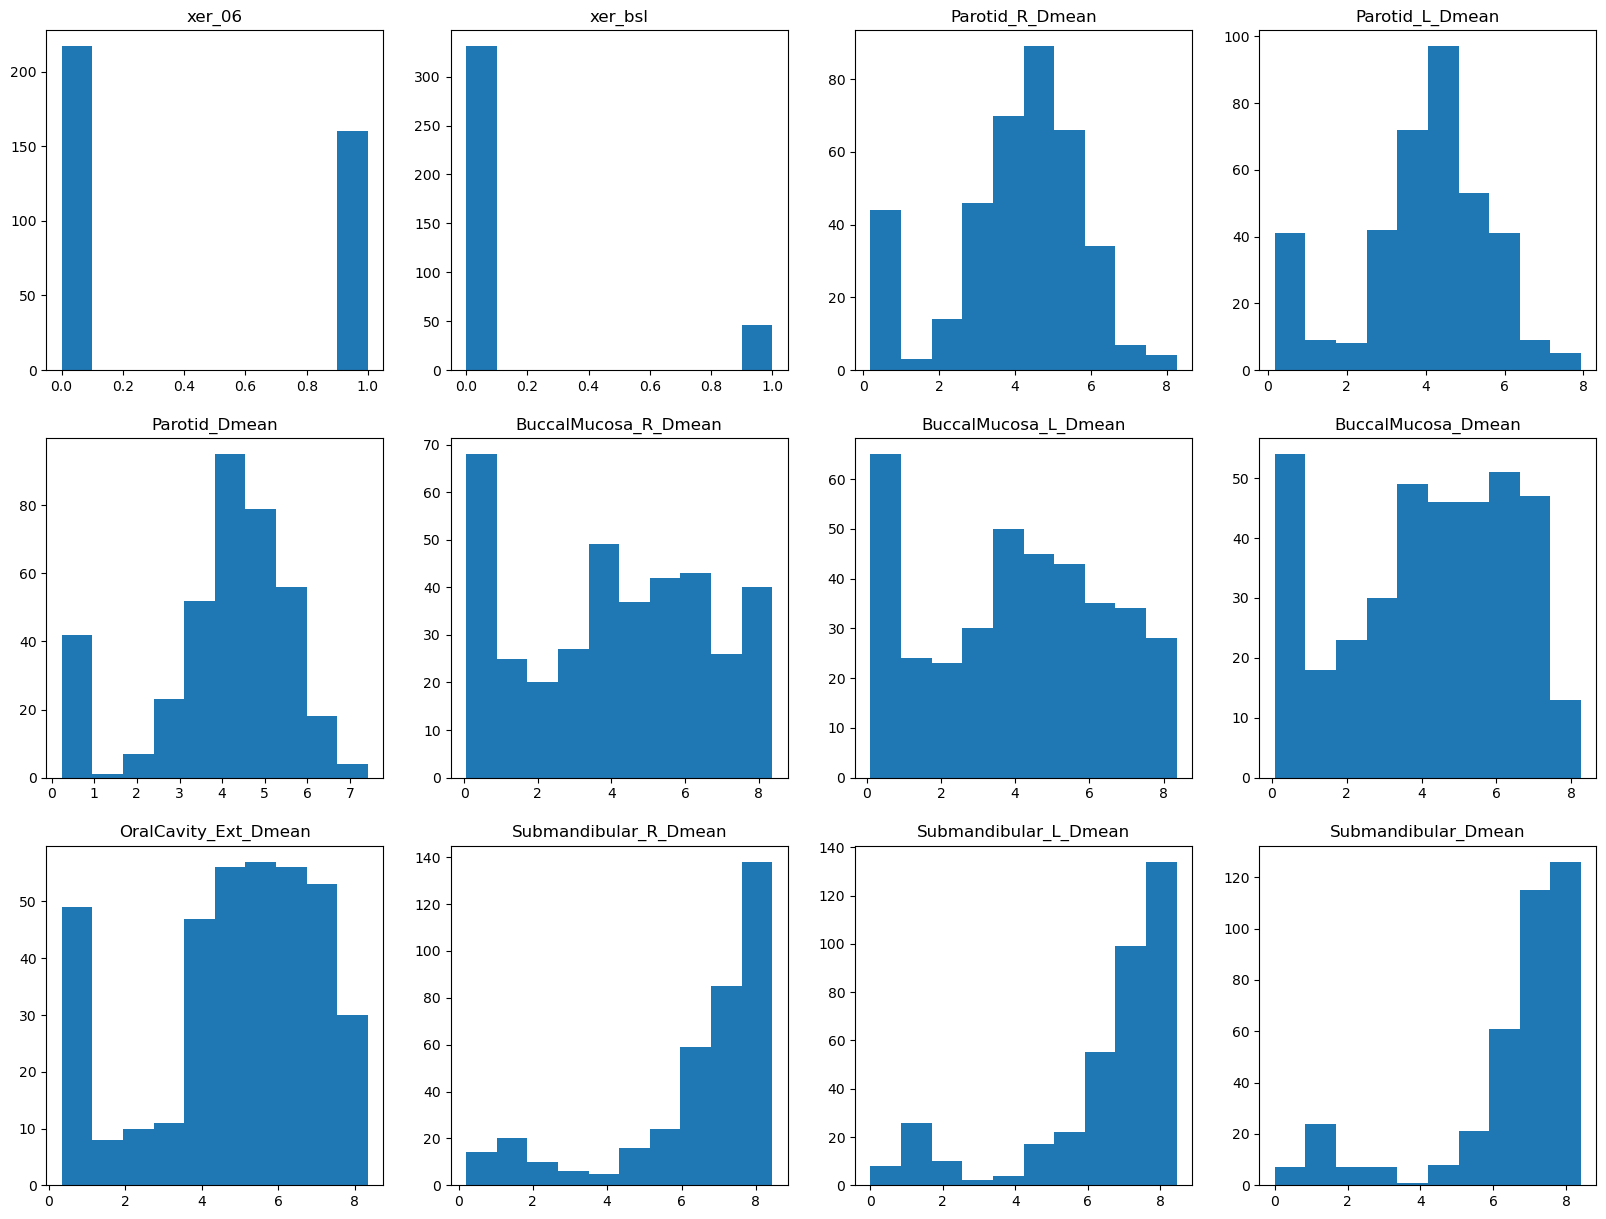

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=4,figsize=(20, 15))
axes = axes.flatten()

# I am using sqrt here. The reason is that it can present the normal distribution of the dose distributions.
for counter, ax in enumerate(axes):
    ax.hist(analyze_df.iloc[:,counter])
    ax.set_title(analyze_df.columns[counter])

plt.show()

Now, I want to look into my data set and try to implement some dtaa inspections.

In [20]:
# make the correlation matrix
corr_matrix = analyze_df.corr()
corr_matrix.head()

,xer_06,xer_bsl,Parotid_R_Dmean,Parotid_L_Dmean,Parotid_Dmean,BuccalMucosa_R_Dmean,BuccalMucosa_L_Dmean,BuccalMucosa_Dmean,OralCavity_Ext_Dmean,Submandibular_R_Dmean,Submandibular_L_Dmean,Submandibular_Dmean
xer_06,1.000000,0.270177,0.299573,0.268345,0.303720,0.278642,0.291941,0.309668,0.311757,0.306397,0.258981,0.297405
xer_bsl,0.270177,1.000000,0.103251,0.067897,0.094168,0.186525,0.195805,0.208588,0.177396,0.067523,0.089485,0.087947
Parotid_R_Dmean,0.299573,0.103251,1.000000,0.710462,0.924144,0.765392,0.549207,0.715793,0.747852,0.854252,0.642648,0.784354
Parotid_L_Dmean,0.268345,0.067897,0.710462,1.000000,0.918537,0.543793,0.761067,0.711765,0.762189,0.637697,0.837285,0.783563
Parotid_Dmean,0.303720,0.094168,0.924144,0.918537,1.000000,0.704284,0.708269,0.773378,0.815678,0.797416,0.791423,0.843040


make a heatmap.

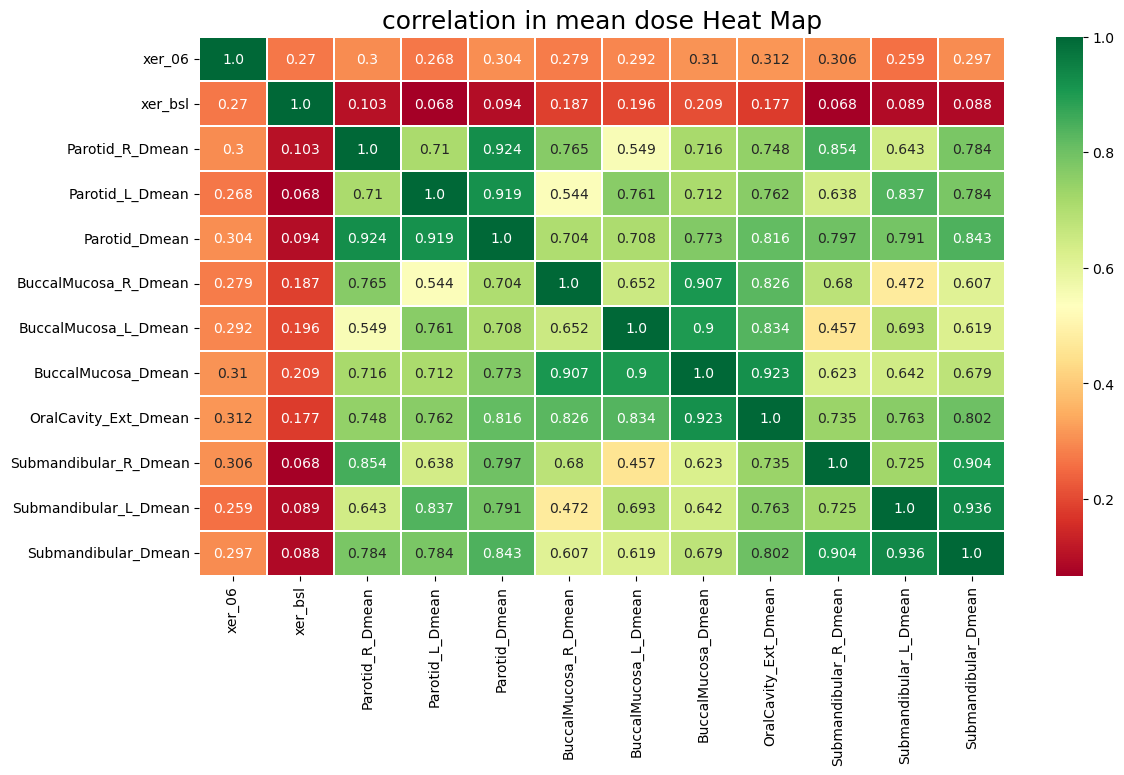

In [21]:
# Define the plot
fig, ax = plt.subplots(figsize=(13,7))

# Add title to the Heat map
title = "correlation in mean dose Heat Map"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])



# Use the heatmap function from the seaborn package
sns.heatmap(corr_matrix, annot=round(corr_matrix,3), fmt="",cmap='RdYlGn',linewidths=0.30,ax=ax)

# Display the Pharma Sector Heatmap
plt.show()

As it can be seen, different features are highly correlated to each others, for example, parotid_Dmean is highly correlated to parotid_R_Dmean and Parotid_L_Dmean which is preety obvious. There are other correlations here in this dataset.

Without more preprocessing steps (since this is the first prototype of my NTCP model), I will implement the univariable analysis part.

### Univariable Analysis

First, I need to add an intercept column to the dataset, since most of the time the regression model contains an intercept.

In [19]:
# First adding a constant column to the dataset.
X = analyze_df.iloc[:,1:]
X = sm.add_constant(X)

# Define the label
y = analyze_df.iloc[:,0]


# making the modelsby using statsmodels 
results = []
for feature in X.columns:
    model = sm.Logit(y, X.loc[:,feature])
    result = model.fit()
    results.append(result)

print("Univariable results:")
for feature, result in zip(X.columns, results):
    print(f"Feature: {feature}")
    print(result.summary())
    print("Univariable significant:", sum(result.pvalues < 0.05), "of", len(result.pvalues))

Optimization terminated successfully.
         Current function value: 0.681673
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.672458
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.692903
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692531
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692676
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693034
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692983
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693080
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693059
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692068
  

Now, I will use sklearn to validfy the outcome of the model.

In [22]:
# Slice the part of the dataset that contains independant variables
X = analyze_df.iloc[:,1:]

# Define the label
y = analyze_df.iloc[:,0]

# This is not the correct way of doing this since the dataset is different each time for each feature 
for feature in X.columns:
    # Split the dataset
    x_train, x_test, y_train, y_test = train_test_split(X.loc[:,[feature]], y)

    model = LogisticRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Evaluate the model (you can use different metrics)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print the results
    print(f"Feature: {feature}")
    print(f"Accuracy: {accuracy:.2f}")
    print(report)   


Feature: xer_bsl
Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.61      0.92      0.73        52
           1       0.75      0.28      0.41        43

    accuracy                           0.63        95
   macro avg       0.68      0.60      0.57        95
weighted avg       0.67      0.63      0.59        95

Feature: Parotid_R_Dmean
Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.74      0.66      0.70        59
           1       0.52      0.61      0.56        36

    accuracy                           0.64        95
   macro avg       0.63      0.64      0.63        95
weighted avg       0.66      0.64      0.65        95

Feature: Parotid_L_Dmean
Accuracy: 0.59
              precision    recall  f1-score   support

           0       0.58      0.82      0.68        51
           1       0.61      0.32      0.42        44

    accuracy                           0.59        95
   macro avg    

We have almost the same answer here. The models are worthless.

In [98]:
def univariable_logistic_regression(DATA, ynam):
    feats_of_interest = DATA.columns
    stats_s = []


    for feat in feats_of_interest:
        X = DATA[feat]
        #X = sm.add_constant(X)
        y = ynam

        model = sm.Logit(y, X)
        result = model.fit()

        # Calculate odds ratio and confidence interval
        params = result.params
        conf_int = result.conf_int()
        StanER = np.sqrt(np.diag(result.cov_params()))
        
        OR = np.exp(params)

        # Calculate statistics
        aic = result.aic
        bic = result.bic
        
        stats_s.append([result.summary2().tables[1].index[0], result.summary2().tables[1]['P>|z|'][0], result.llf, aic, bic, 
                       params[feat], OR[feat], np.exp(conf_int.loc[feat, 0]), np.exp(conf_int.loc[feat, 1]), result.nobs, 
                       result.nobs - len(result.params)])

    colnames_stats_s = ['variable', 'p_value', 'Log-Likelihood', 'AIC', 'BIC', 'beta', 'OR', 'OR95-', 'OR95+', 'n', 'event']
    univar_result = pd.DataFrame(stats_s, columns=colnames_stats_s)


    univar_result['p_LRT'] = stats.chi2.sf(univar_result['Log-Likelihood'], 1)

    return univar_result

In [99]:
# First adding a constant column to the dataset.
X = analyze_df.iloc[:,1:]

# Define the label
y = analyze_df.iloc[:,0]

result = univariable_logistic_regression(X, y)

Optimization terminated successfully.
         Current function value: 0.672458
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.692903
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692531
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692676
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693034
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692983
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693080
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693059
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692068
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.691136
  

In [101]:
result

,variable,p_value,Log-Likelihood,AIC,BIC,beta,OR,OR95-,OR95+,n,event,p_LRT
0,xer_bsl,0.000339,-253.516688,509.033377,512.965622,1.280934,3.600000,1.786619,7.253927,377,376,1.0
1,Parotid_R_Dmean,0.667628,-261.224260,524.448520,528.380765,-0.010094,0.989957,0.945383,1.036633,377,376,1.0
2,Parotid_L_Dmean,0.495753,-261.084273,524.168546,528.100791,-0.016391,0.983743,0.938426,1.031248,377,376,1.0
3,Parotid_Dmean,0.551085,-261.138687,524.277373,528.209619,-0.014170,0.985930,0.941051,1.032949,377,376,1.0
4,BuccalMucosa_R_Dmean,0.769871,-261.273687,524.547375,528.479620,0.006264,1.006284,0.964924,1.049417,377,376,1.0
5,BuccalMucosa_L_Dmean,0.725282,-261.254725,524.509449,528.441695,0.007759,1.007790,0.965105,1.052361,377,376,1.0
6,BuccalMucosa_Dmean,0.822404,-261.291295,524.582589,528.514834,0.004870,1.004882,0.963045,1.048537,377,376,1.0
7,OralCavity_Ext_Dmean,0.796252,-261.283149,524.566298,528.498543,-0.004976,0.995036,0.958149,1.033343,377,376,1.0
8,Submandibular_R_Dmean,0.367418,-260.909764,523.819528,527.751773,-0.013735,0.986359,0.957333,1.016264,377,376,1.0
9,Submandibular_L_Dmean,0.218664,-260.558092,523.116184,527.048430,-0.018777,0.981398,0.952472,1.011204,377,376,1.0


I have used three different methods to calculate univariable logistic regression for this problem but the **first one** is the best one. I mean by using stat library. To continue with, I will use forward selcetion method to extract the most dominant features. However, based on the plots and the resaults I have seen until now, I think, the model cannot find a definite set of features.

## Feature Forward Selection
Before using feature selection model, I prefer to use the dataset to train a model with all the columns. I know that it is wrong since most of these columns are completely correlated to each other and the final model will be purely overfitted. But again I thnk it worth it to try something new here. (using gridsearchCV)

In [35]:
def multiple_grid_search(estimator_dict, scoring_list, cv_number, refit_method, data_dict):

    final_dict = {}

    for name in estimator_dict.keys():
        # Create the GridSearchCV object
        grid_search = GridSearchCV(estimator=estimator_dict[name][0], param_grid=estimator_dict[name][1],
                                    scoring=scoring_list, cv=cv_number, refit=refit_method)
        
        # Fit the the best model to the data
        grid_search.fit(data_dict['x'], data_dict['y'])

        # Save the best estimator for each model
        final_dict[name] = {'best_model': grid_search.best_estimator_,
                            'best_parameters': grid_search.best_params_,
                            'best_score': grid_search.best_score_}

    # order the dictionary based on the magnitude of the scores
    final_dict = dict(sorted(final_dict.items(), key=lambda item: -1 * item[1]['best_score']))
     
    return final_dict

In [36]:
# First adding a constant column to the dataset.
X = analyze_df.iloc[:,1:]

# Define the label
y = analyze_df.iloc[:,0]

In [37]:


# make parameters dictionaries
#LinearSVC
svc_param = {'C': np.arange(0.01, 10, 0.25),
             'kernel': ['linear', 'rbf', 'poly'],
             'gamma': ['scale', 'auto'],
             'degree': np.arange(2,10,1)}

# GAMS
gams_param= param_grid = [{'s(0)': [5, 10, 15], 's(1)': [5, 10, 15]},
                          {'s(0)': [10, 20, 30], 's(1)': [10, 20, 30]}]

# Create a pipeline with PolynomialFeatures and LogisticRegression
logistic_regression_pipeline = Pipeline([('polynomial', PolynomialFeatures()),
                                         ('LogisticRegression', LogisticRegression())])

# Logitic Regression
lr_param = {'polynomial__degree': np.arange(2,10,1),
            'LogisticRegression__C':  np.arange(0.01, 10, 0.25),
            'LogisticRegression__penalty': ['l1', 'l2']}

# Scoring list
scoring_list = ['roc_auc', 'f1', 'accuracy']

# Make estimator dictionary
estimator_dict={'SVC': [SVC(), svc_param],
                'LogisitcGAMS': [LogisticGAM(), gams_param],
                'LogisticRegression': [logistic_regression_pipeline, lr_param]}

# Make data dictionary
data_dict =  {'x': X, 
              'y': y}
final_dict = multiple_grid_search(estimator_dict, scoring_list, 5, 'roc_auc', data_dict)



 
Interesingly, there is no function in sklearn for forward selection method. However, I found another library that has forward selection, so for this python version of CITOR NTCP model, I will first use the mentioned package and then make a function that implements forward selection. 

In [30]:
# Define the feature selection model with the best parameters
lr = LogisticRegression()
ffs = SequentialFeatureSelector(lr, k_features=4, forward=True, verbose=2, scoring='neg_mean_squared_error')

ffs.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2023-10-25 20:22:48] Features: 1/4 -- score: -0.35529824561403506[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2023-10-25 20:22:48] Features: 2/4 -- score: -0.318280701754386[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2023-10-25 20:22:48] Features: 3/4 -- score: -0.31298245614035086[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(4, 4),
                          scoring='neg_mean_squared_error', verbose=2)

In [31]:
ffs.k_feature_names_

('xer_bsl',
 'BuccalMucosa_L_Dmean',
 'BuccalMucosa_Dmean',
 'Submandibular_Dmean')